In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.metrics import pairwise_distances
dataset= pd.read_csv("C://Users//muchiri//Downloads//USArrests.csv")

In [96]:
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [98]:
dataset.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [100]:
dataset.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [102]:
dataset.shape

(50, 5)

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [106]:
dataset.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [108]:
dataset= dataset.rename(columns={'Unnamed: 0':'State'})

In [110]:
dataset.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


<Axes: xlabel='State'>

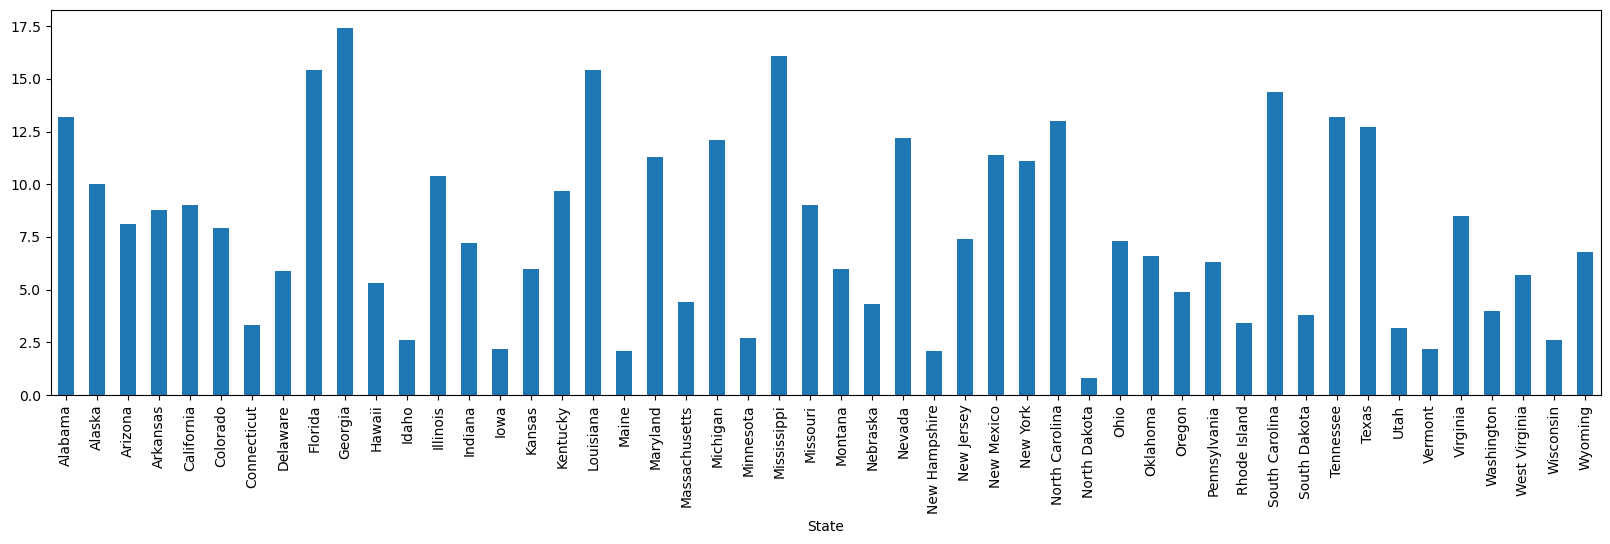

In [114]:
plt.figure(figsize=(20,5))
dataset.groupby('State')['Murder'].max().plot(kind='bar')

<Axes: xlabel='State'>

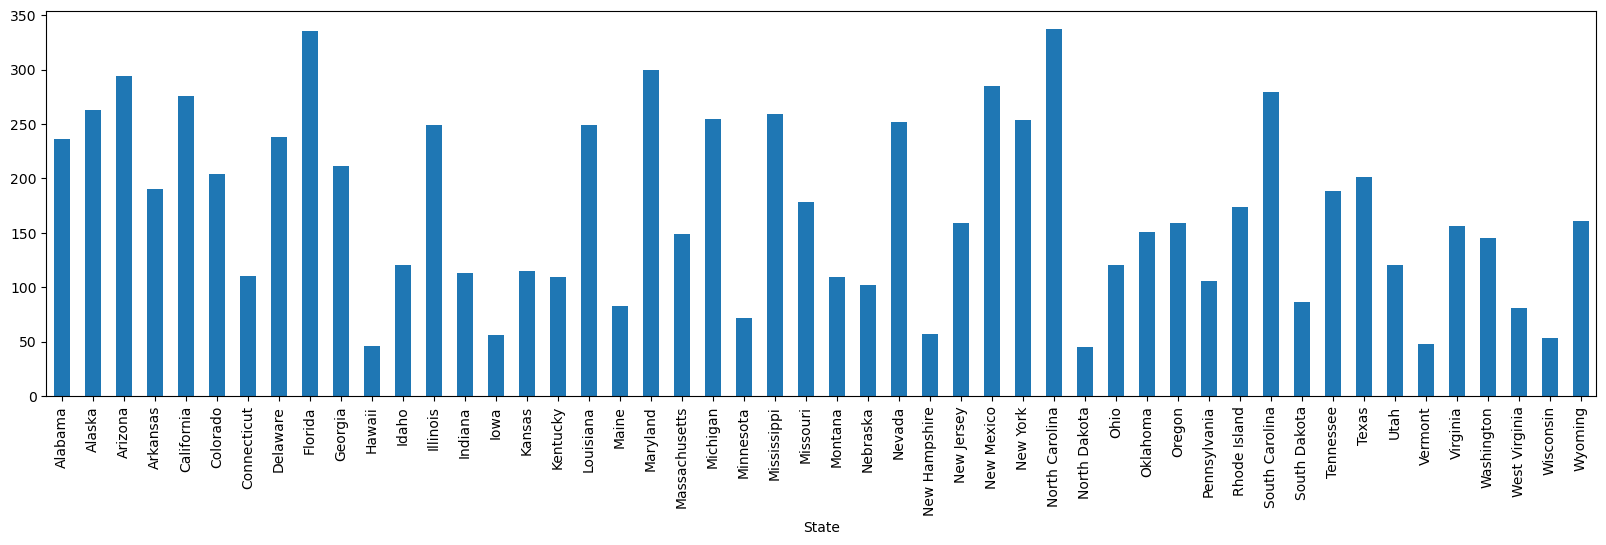

In [115]:
plt.figure(figsize=(20,5))
dataset.groupby('State')['Assault'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

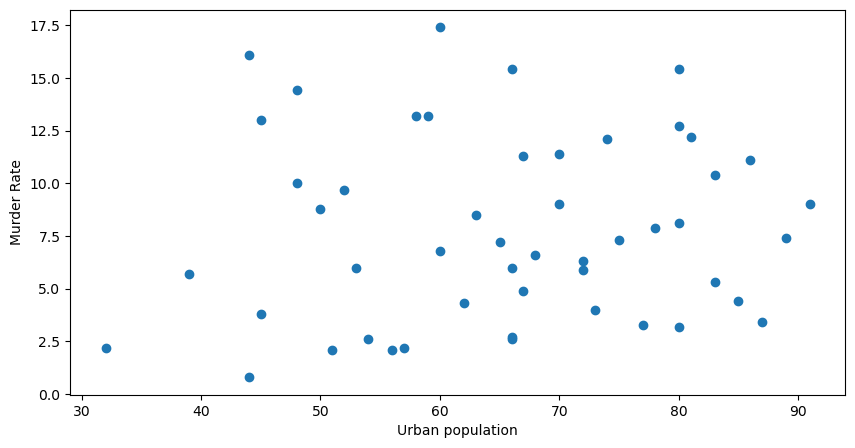

In [116]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder', data=dataset)
plt.xlabel('Urban population')
plt.ylabel('Murder Rate')

In [117]:
data=dataset.iloc[:,1:].values
scaled_data=scaler.fit_transform(data)

Text(0, 0.5, 'Euclidean Distance')

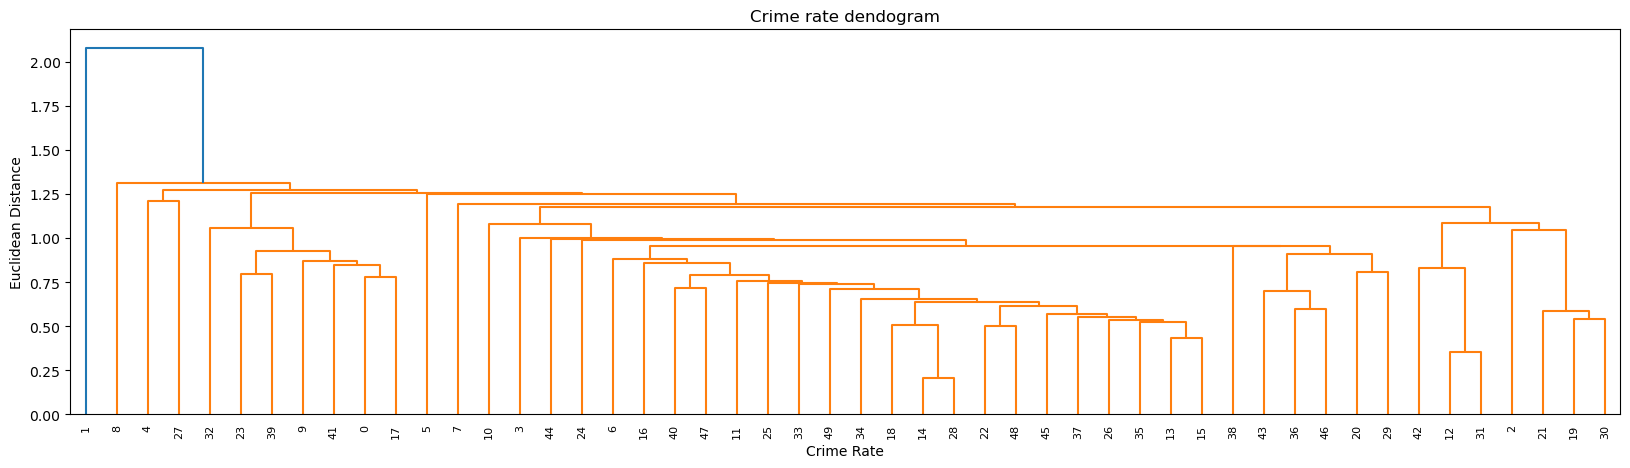

In [118]:
#shortest distance btw the data points- single linkage
plt.figure(figsize=(20,5))
plt.title('Crime rate dendogram')
dend=sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean Distance')

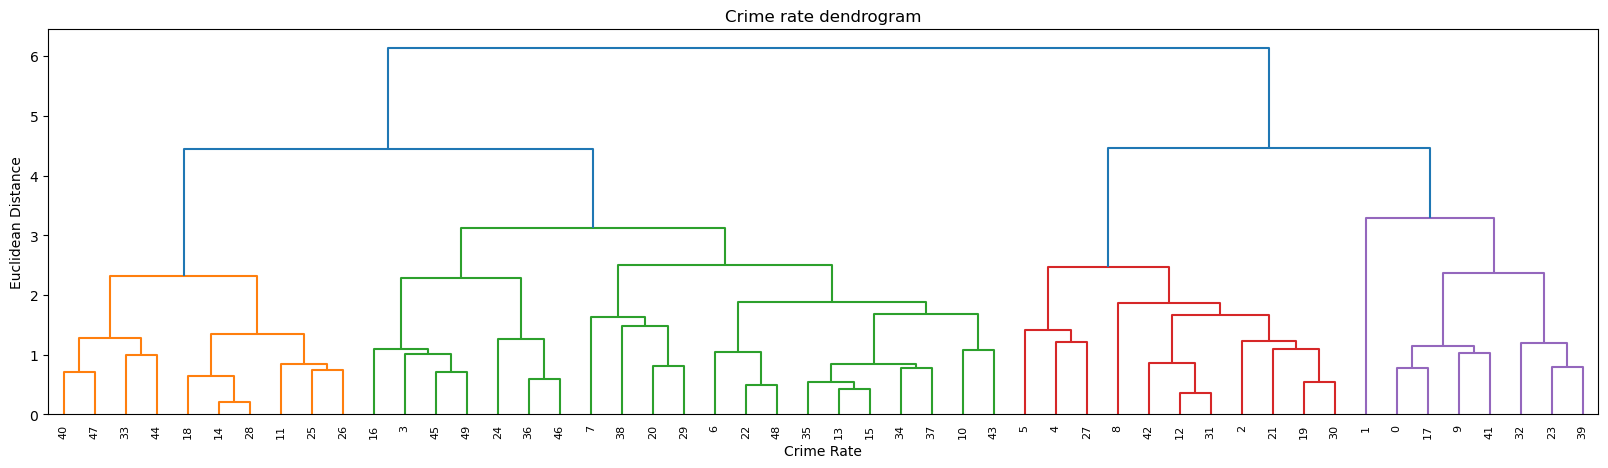

In [120]:
#maximum distance- complete linkage
plt.figure(figsize=(20,5))
plt.title('Crime rate dendrogram')
dend=sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean Distance')

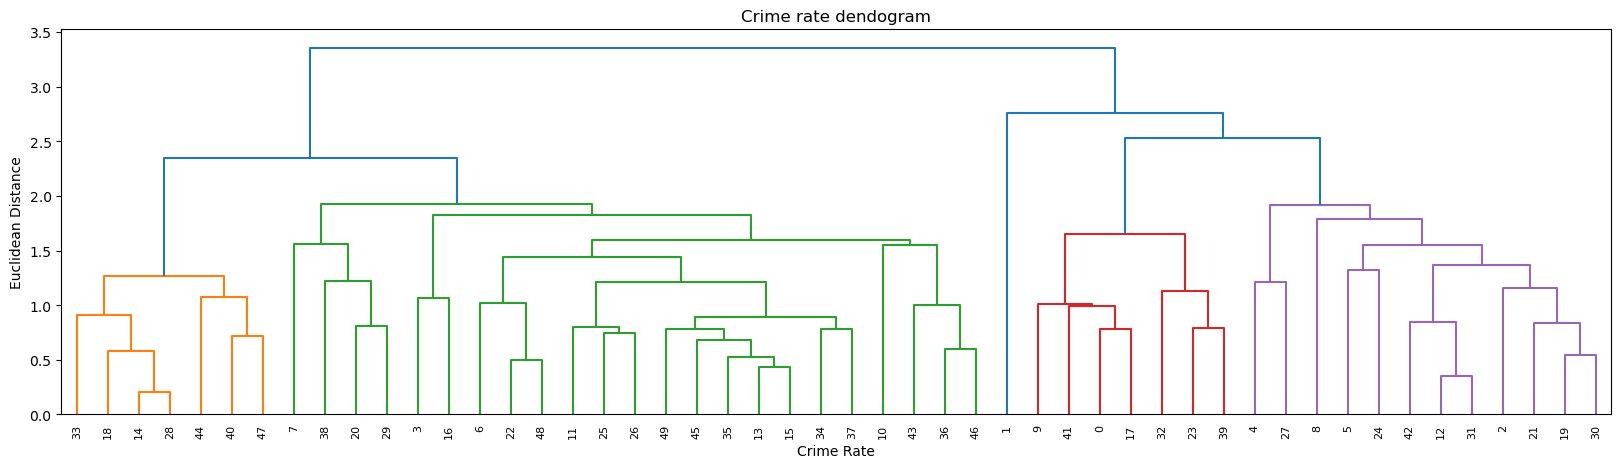

In [121]:
#average linkage-btw every point
plt.figure(figsize=(20,5))
plt.title('Crime rate dendogram')
dend=sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distance')

Text(0, 0.5, 'Euclidean Distance')

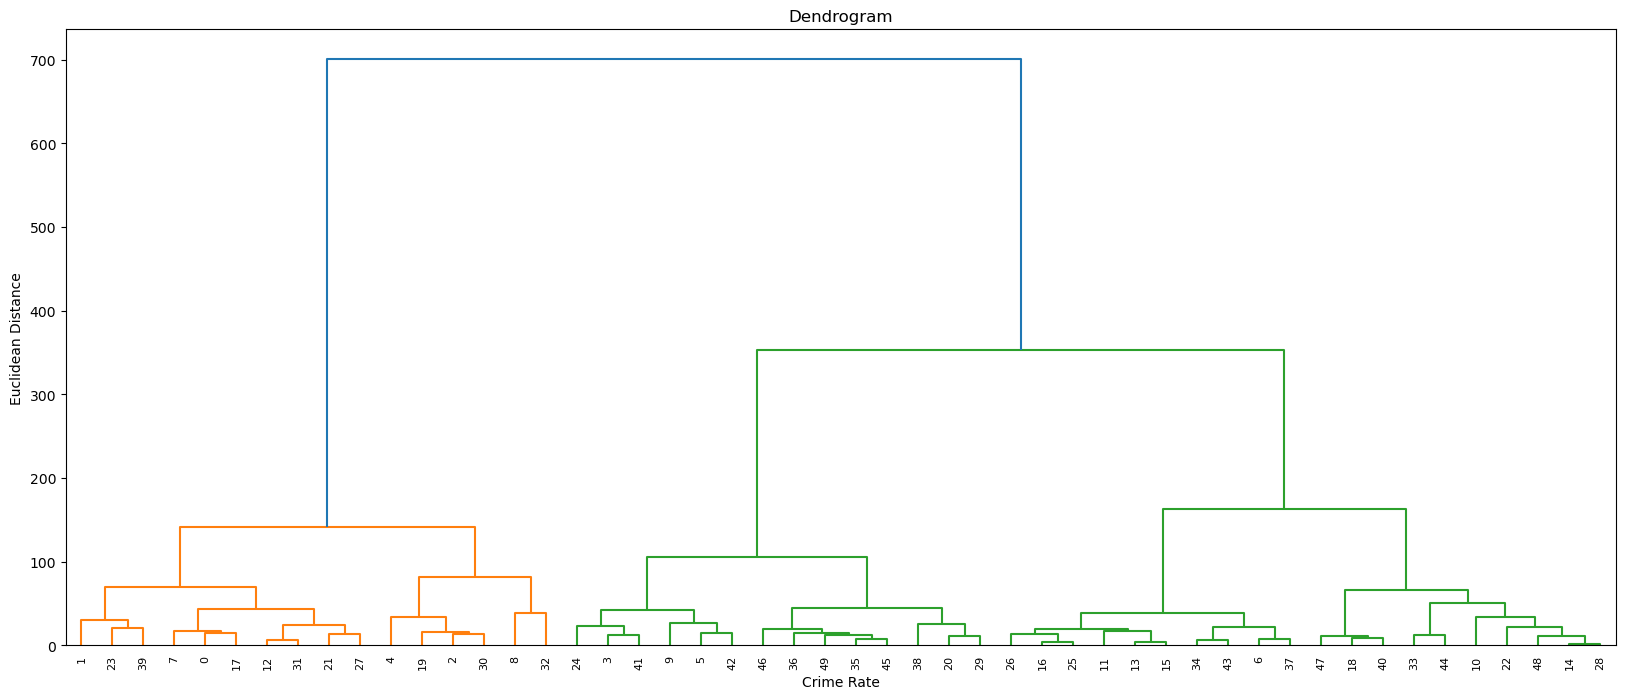

In [122]:
#optimal no of clusters
plt.figure(figsize=(20,8))
dend=sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean Distance')

In [128]:
#predicting where they fall
ac=AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [130]:
y_pred=ac.fit_predict(data)

In [132]:
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [134]:
dataset['Clusterlabels']=y_pred

In [136]:
dataset[['State', 'Clusterlabels']]

,State,Clusterlabels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<Axes: xlabel='Clusterlabels', ylabel='Murder'>

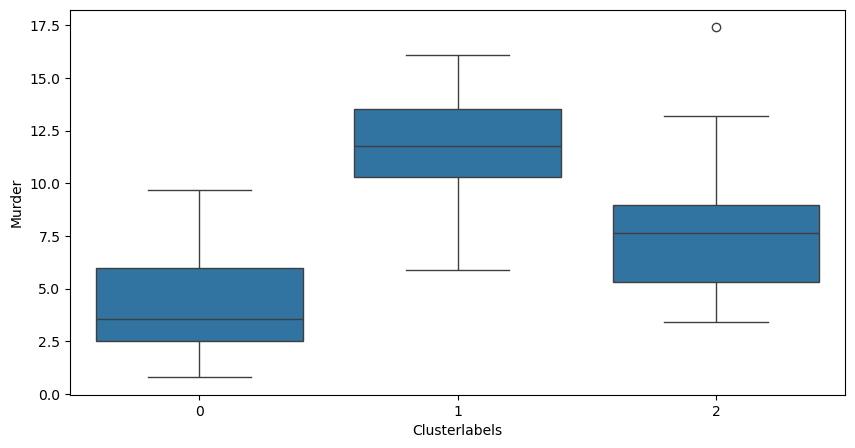

In [138]:
#using boxplot to see where we're falling
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusterlabels', y='Murder', data=dataset)

In [140]:
safezone=dataset.groupby('Clusterlabels')['State'].unique()[0]
safezone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [142]:
badzone=dataset.groupby('Clusterlabels')['State'].unique()[1]
badzone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [144]:

moderatezone=dataset.groupby('Clusterlabels')['State'].unique()[2]
moderatezone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

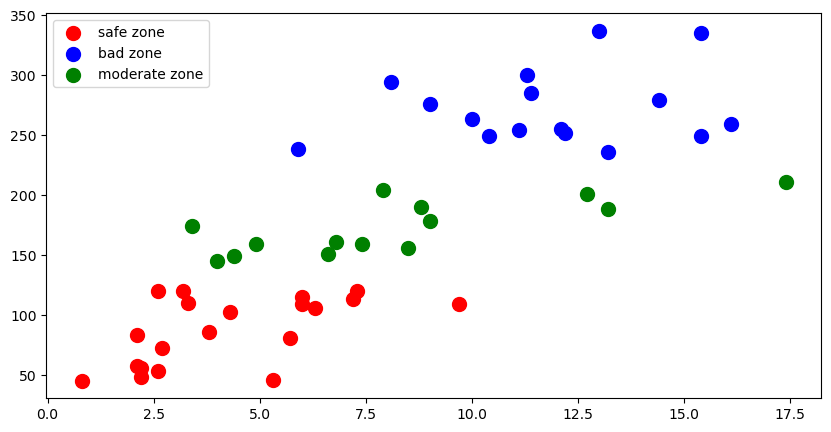

In [148]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label='safe zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label='bad zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label='moderate zone')
plt.legend()